In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
df = pd.read_csv('C:/Users/sheth/Desktop/fake_transactional_data_24.csv')
df


# Display the first few rows of the dataframe
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   from_totally_fake_account  monopoly_money_amount  \
0                    10371.0                   4.00   
1                    88339.0                   2.40   
2                    18555.0                   2.40   
3                    18555.0                   4.10   
4                    80792.0                   1.95   

  to_randomly_generated_account not_happened_yet_date  
0                        CINEMA            01/01/2025  
1                         40544            01/01/2025  
2                         85149            01/01/2025  
3           HIPSTER_COFFEE_SHOP            01/01/2025  
4                         18555            01/01/2025  
       from_totally_fake_account  monopoly_money_amount
count               1.014828e+07           1.014828e+07
mean                5.080502e+04           1.839348e+01
std                 2.893710e+04           8.612323e+01
min                 1.000000e+03           1.450000e+00
25%                 2.530400e+04           2.650000e+

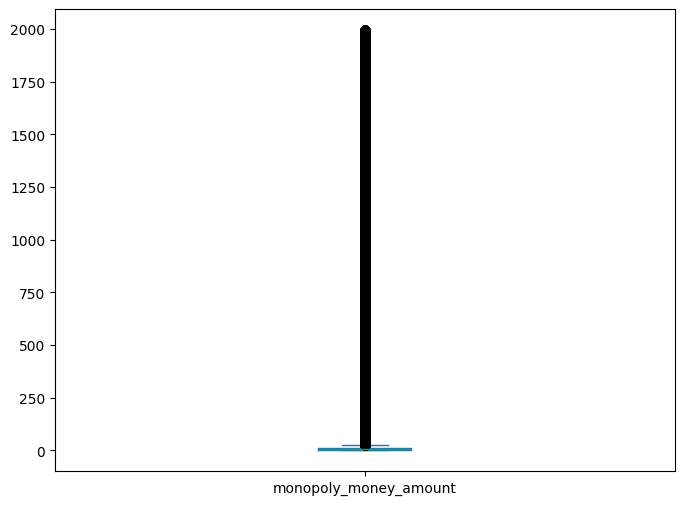

In [2]:
#approach1
# Box plot for the 'monopoly_money_amount' column
plt.figure(figsize=(8, 6))
df['monopoly_money_amount'].plot(kind='box')
plt.show()

In [3]:
#approach2
from scipy import stats
# z-score for 'monopoly_money_amount'
z_scores = stats.zscore(df['monopoly_money_amount'])
# Threshold for outlier detection (e.g., 3 or -3)
threshold = 3

# Find the data points with z-score greater than the threshold
outliers = df['monopoly_money_amount'][abs(z_scores) > threshold]
print(outliers)


11405        290.0
15281       1970.0
15282        440.0
15545        302.0
15546        302.0
             ...  
10077650     282.0
10089362     296.0
10104950     277.0
10105128     298.0
10139485     298.0
Name: monopoly_money_amount, Length: 75524, dtype: float64


In [4]:
#approach3
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['monopoly_money_amount'].quantile(0.25)
Q3 = df['monopoly_money_amount'].quantile(0.75)
# Calculate the IQR
IQR = Q3 - Q1
# Find the data points that are potential outliers
outliers = df[(df['monopoly_money_amount'] < (Q1 - 1.5 * IQR)) | (df['monopoly_money_amount'] > (Q3 + 1.5 * IQR))]['monopoly_money_amount']
print(outliers)
len(outliers)  #75524 Outliers

25           84.00
61          180.00
126         163.00
130         130.00
146          37.55
             ...  
10148190     42.00
10148211    193.00
10148215     33.47
10148238    106.00
10148265     65.00
Name: monopoly_money_amount, Length: 1008638, dtype: float64


1008638

In [5]:
#feature Scaling
# Calculate the percentiles
percentiles = df['monopoly_money_amount'].quantile([0.2, 0.4, 0.6, 0.8, 0.95])

# Define the boundaries for the categories
boundary_1 = percentiles.iloc[0]  # 20th percentile
boundary_2 = percentiles.iloc[1]  # 40th percentile
boundary_3 = percentiles.iloc[2]  # 60th percentile
boundary_4 = percentiles.iloc[3]  # 80th percentile
boundary_5 = percentiles.iloc[4]  # 95th percentile

# Categorize transactions based on the amount
def categorize_amount(amount):
    if amount <= boundary_1:
        return "Very Small Transactions"
    elif amount <= boundary_2:
        return "Small Transactions"
    elif amount <= boundary_3:
        return "Moderate Transactions"
    elif amount <= boundary_4:
        return "Large Transactions"
    elif amount <= boundary_5:
        return "Very Large Transactions"
    else:
        return "Extreme Transactions"

# Create a new column for the transaction category
df['transaction_category'] = df['monopoly_money_amount'].apply(categorize_amount)

# Display the updated DataFrame with transaction categories
print(df)


          from_totally_fake_account  monopoly_money_amount  \
0                           10371.0                   4.00   
1                           88339.0                   2.40   
2                           18555.0                   2.40   
3                           18555.0                   4.10   
4                           80792.0                   1.95   
...                             ...                    ...   
10148275                    32185.0                   2.65   
10148276                    32185.0                   2.45   
10148277                    57569.0                  14.00   
10148278                     1490.0                   9.00   
10148279                    53444.0                   2.65   

         to_randomly_generated_account not_happened_yet_date  \
0                               CINEMA            01/01/2025   
1                                40544            01/01/2025   
2                                85149            01/01/2025   

In [6]:
# Count the number of categorized transactions 
very_small_count = df[df['transaction_category'] == 'Very Small Transactions'].shape[0]
small_count = df[df['transaction_category'] == 'Small Transactions'].shape[0]
moderate_count = df[df['transaction_category'] == 'Moderate Transactions'].shape[0]
large_count = df[df['transaction_category'] == 'Large Transactions'].shape[0]
very_large_count = df[df['transaction_category'] == 'Very Large Transactions'].shape[0]
extreme_count = df[df['transaction_category'] == 'Extreme Transactions'].shape[0]

print("Number of transactions categorized as 'Very Small':", very_small_count)
print("Number of transactions categorized as 'Small':", small_count)
print("Number of transactions categorized as 'Moderate':", moderate_count)
print("Number of transactions categorized as 'Large':", large_count)
print("Number of transactions categorized as 'Very Large':", very_large_count)
print("Number of transactions categorized as 'Extreme':", extreme_count)


Number of transactions categorized as 'Very Small': 2033108
Number of transactions categorized as 'Small': 2250281
Number of transactions categorized as 'Moderate': 2070823
Number of transactions categorized as 'Large': 1823385
Number of transactions categorized as 'Very Large': 1471100
Number of transactions categorized as 'Extreme': 499583


In [7]:
# Define keywords related to cafes or coffee
cafe_keywords = ['coffee', 'cafe']  

# Filter transactions containing keywords related to cafes or coffee
cafe_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(cafe_keywords), case=False, na=False)]

# Count the number of cafe transactions
cafe_transactions_count = len(cafe_transactions)

# Filter out transactions from the original dataframe based on cafe_transactions
non_cafe_transactions = df[~df.index.isin(cafe_transactions.index)]

# Print details of non-cafe transactions
print("Non-Cafe Transactions:")
print(non_cafe_transactions)

# Extract unique accounts associated with non-cafe transactions
accounts_non_cafe = non_cafe_transactions['to_randomly_generated_account'].unique()

# Print the count of non-cafe transactions
print("\nNumber of transactions not related to cafes or coffee:", len(non_cafe_transactions))

# Print the accounts with transactions not related to cafes or coffee
print("\nAccounts with transactions not related to cafes or coffee:")
print(accounts_non_cafe)

# Print details of cafe transactions
print("Cafe Transactions:")
print(cafe_transactions) #Insight1: There are 2710537 transactions related to coffee spends

# Group transactions by the name of the coffee shop and count the occurrences
coffee_shop_frequency = cafe_transactions['to_randomly_generated_account'].value_counts()

# Print the frequency of transactions in each coffee shop
print("Frequency of Transactions in Each Coffee Shop:")
print(coffee_shop_frequency)


Non-Cafe Transactions:
          from_totally_fake_account  monopoly_money_amount  \
0                           10371.0                   4.00   
1                           88339.0                   2.40   
2                           18555.0                   2.40   
4                           80792.0                   1.95   
12                          77222.0                   4.50   
...                             ...                    ...   
10148262                    24676.0                   2.20   
10148265                    68829.0                  65.00   
10148269                    66350.0                   5.00   
10148277                    57569.0                  14.00   
10148278                     1490.0                   9.00   

         to_randomly_generated_account not_happened_yet_date  \
0                               CINEMA            01/01/2025   
1                                40544            01/01/2025   
2                                85149  

In [8]:
# Define keywords related to bars, pubs, or drinks
bar_pub_keywords = ['bar', 'pub', 'drinks', 'liquor'] 

# Filter transactions containing keywords related to bars, pubs, or drinks
bar_pub_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(bar_pub_keywords), case=False, na=False)]

# Print details of bar/pub transactions
print("Bar/Pub Transactions:")
print(bar_pub_transactions) #Insight2: There are 2165313 transactions corresponding to Pub spends


# Group transactions by the name of the bar or pub and count the occurrences
bar_pub_frequency = bar_pub_transactions['to_randomly_generated_account'].value_counts()

# Print the frequency of transactions in each bar or pub
print("Frequency of Transactions in Each Bar/Pub:")
print(bar_pub_frequency)


Bar/Pub Transactions:
          from_totally_fake_account  monopoly_money_amount  \
34                          82454.0                   12.0   
49                          60261.0                   13.0   
68                          77763.0                   10.5   
90                          71642.0                   10.0   
105                         92552.0                    5.0   
...                             ...                    ...   
10148212                    14036.0                    9.0   
10148220                    14214.0                   11.0   
10148240                    14277.0                   11.0   
10148255                     1490.0                   14.0   
10148277                    57569.0                   14.0   

         to_randomly_generated_account not_happened_yet_date  \
34                                 BAR            01/01/2025   
49                                 PUB            01/01/2025   
68                                 PUB   

In [9]:
# Define keywords related to toys or video games
toy_video_game_keywords = ['toy', 'videogame']  

# Filter transactions containing keywords related to toys or video games
toy_video_game_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(toy_video_game_keywords), case=False, na=False)]

# Print details of toy/video game transactions
print("Toy/Video Game Transactions:")
print(toy_video_game_transactions) #Insight3: There are 25607 transactions corresponding to Toy spends

# Group transactions by the account details and count the occurrences
toy_video_game_frequency = toy_video_game_transactions['to_randomly_generated_account'].value_counts()

# Print the frequency of transactions related to toys or video games
print("Frequency of Transactions Related to Toys or Video Games:")
print(toy_video_game_frequency)


Toy/Video Game Transactions:
          from_totally_fake_account  monopoly_money_amount  \
25                          23972.0                   84.0   
360                         44472.0                   22.0   
450                         63615.0                   56.0   
1130                        89603.0                   20.0   
1199                        27700.0                   10.0   
...                             ...                    ...   
10147252                    59803.0                   48.0   
10147653                    80956.0                   98.0   
10147782                    58977.0                   49.0   
10147904                     4309.0                   86.0   
10148160                    18602.0                   74.0   

         to_randomly_generated_account not_happened_yet_date  \
25                            TOY_SHOP            01/01/2025   
360                       PET_TOY_SHOP            01/01/2025   
450                           TOY_

In [10]:
# Define keywords related to restaurants, takeaways, Chinese cuisine, or hotels
restaurant_keywords = ['restaurant', 'take away', 'chinese', 'steak', 'sandwich']  

# Filter transactions containing keywords related to restaurants, takeaways, Chinese cuisine, or hotels
restaurant_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(restaurant_keywords), case=False, na=False)]

# Print details of restaurant transactions
print("Restaurant Transactions:")
#Insight4: There are 449032 transactions corresponding to Restaurant spends

# Group transactions by the account details and count the occurrences
restaurant_frequency = restaurant_transactions['to_randomly_generated_account'].value_counts()

# Print the frequency of transactions related to restaurants
print("Frequency of Transactions Related to Restaurants:")
print(restaurant_frequency)


Restaurant Transactions:
Frequency of Transactions Related to Restaurants:
to_randomly_generated_account
LOCAL_RESTAURANT      172030
SANDWICH_SHOP         111143
RESTAURANT             68053
CHINESE_TAKEAWAY       60929
RESTAURANT_VOUCHER     14627
CHINESE_RESTAURANT      7468
INDIAN_RESTAURANT       7429
STEAK_HOUSE             7353
Name: count, dtype: int64


In [11]:
# Define keywords related to sports or running
sport_running_keywords = ['sport', 'running']  

# Filter transactions containing keywords related to sports or running
sport_running_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(sport_running_keywords), case=False, na=False)]

# Print details of sport/running transactions
print("Sport/Running Transactions:")
print(sport_running_transactions) #Insight5: There are 11559 transactions corresponding to sports spends

# Group transactions by the account details and count the occurrences
sport_running_frequency = sport_running_transactions['to_randomly_generated_account'].value_counts()

# Print the frequency of transactions related to sports or running
print("Frequency of Transactions Related to Sports or Running:")
print(sport_running_frequency)


Sport/Running Transactions:
          from_totally_fake_account  monopoly_money_amount  \
196                         44974.0                   53.0   
602                         30643.0                  119.0   
1369                        95243.0                   61.0   
1527                        91906.0                  109.0   
1698                        16464.0                   94.0   
...                             ...                    ...   
10147311                    39335.0                  107.0   
10147745                    72226.0                   83.0   
10148137                    96641.0                   65.0   
10148238                    14277.0                  106.0   
10148265                    68829.0                   65.0   

         to_randomly_generated_account not_happened_yet_date  \
196        FASHIONABLE_SPORTSWARE_SHOP            01/01/2025   
602                       RUNNING_SHOP            01/01/2025   
1369                        SPORT_S

In [12]:
# Define the keyword related to supermarkets
supermarket_keyword = ['supermarket']

# Filter transactions containing the keyword "supermarket"
supermarket_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(supermarket_keyword), case=False, na=False)]

# Print details of supermarket transactions
print("Supermarket Transactions:")
print(supermarket_transactions) #Insight6: There are 326917 transactions corresponding to Supermarket spends

# Group transactions by the account details and count the occurrences
supermarket_frequency = supermarket_transactions['to_randomly_generated_account'].value_counts()

# Print the frequency of transactions related to supermarkets
print("Frequency of Transactions Related to Supermarkets:")
print(supermarket_frequency)

Supermarket Transactions:
          from_totally_fake_account  monopoly_money_amount  \
17213                       81529.0                 105.63   
17214                        9685.0                 101.44   
17216                       31303.0                 134.03   
17217                       69330.0                 141.19   
17218                       45115.0                  42.31   
...                             ...                    ...   
10144117                    41093.0                 113.44   
10144118                    20755.0                  64.77   
10144119                    25505.0                 129.41   
10144120                    47203.0                 121.92   
10144121                    48553.0                 117.08   

         to_randomly_generated_account not_happened_yet_date  \
17213                LARGE_SUPERMARKET            01/01/2025   
17214                LARGE_SUPERMARKET            01/01/2025   
17216                LARGE_SUPERMARKE

In [13]:
# Define categories and their corresponding keywords
categories = {
    'Cafe': ['coffee', 'cafe'],
    'Pub': ['pub', 'bar', 'drinks'],
    'Toy': ['toy', 'videogame'],
    'Restaurant': ['restaurant', 'take away', 'chinese', 'hotel'],
    'Sports': ['sport', 'running'],
    'Supermarket': ['grocery', 'supermarket']
}

# Initialize dictionaries to store most and least expensive transactions for each category
most_expensive_transactions = {}
least_expensive_transactions = {}

# Iterate through each category and find the most and least expensive transactions
for category, keywords in categories.items():
    category_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(keywords), case=False, na=False)]
    most_expensive_transactions[category] = category_transactions.loc[category_transactions['monopoly_money_amount'].idxmax()]
    least_expensive_transactions[category] = category_transactions.loc[category_transactions['monopoly_money_amount'].idxmin()]

# Print the most expensive and least expensive transactions for each category
for category in categories.keys():
    print(f"\nMost Expensive Transaction in {category} Transactions:")
    print(most_expensive_transactions[category])
    print(f"\nLeast Expensive Transaction in {category} Transactions:")
    print(least_expensive_transactions[category])


Most Expensive Transaction in Cafe Transactions:
from_totally_fake_account                      35034.0
monopoly_money_amount                              6.0
to_randomly_generated_account                     CAFE
not_happened_yet_date                       01/01/2025
transaction_category             Moderate Transactions
Name: 284, dtype: object

Least Expensive Transaction in Cafe Transactions:
from_totally_fake_account                        18555.0
monopoly_money_amount                               1.45
to_randomly_generated_account                COFFEE_SHOP
not_happened_yet_date                         01/01/2025
transaction_category             Very Small Transactions
Name: 6, dtype: object

Most Expensive Transaction in Pub Transactions:
from_totally_fake_account                     83210.0
monopoly_money_amount                            60.0
to_randomly_generated_account               LOCAL_PUB
not_happened_yet_date                      01/01/2025
transaction_category      

In [14]:
# Define categories and their corresponding keywords
categories = {
    'Cafe': ['coffee', 'cafe'],
    'Pub': ['pub', 'bar', 'drinks'],
    'Toy': ['toy', 'videogame'],
    'Restaurant': ['restaurant', 'take away', 'chinese', 'hotel'],
    'Sports': ['sport', 'running'],
    'Supermarket': ['grocery', 'supermarket']
}

# Initialize a dictionary to store variance for each category
category_variances = {}

# Iterate through each category and calculate variance
for category, keywords in categories.items():
    category_transactions = df[df['to_randomly_generated_account'].str.contains('|'.join(keywords), case=False, na=False)]
    category_variances[category] = category_transactions['monopoly_money_amount'].var()

# Print variance for each category
print("Variance for Each Category:")
for category, variance in category_variances.items():
    print(f"{category}: {variance}")

Variance for Each Category:
Cafe: 0.6617157213491638
Pub: 54.41778959630178
Toy: 817.4024157122032
Restaurant: 349.4143292759993
Sports: 670.3987263160701
Supermarket: 1890.970254530142
